# Grammar-of-graphics in Python

## Datavisualisatie met Altair

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rrodenburg/KnowledgeSharing/blob/main/DataBaaS/gg_in_python_altair.ipynb)

Lees deze blog - **met werkende code en interactieve visualisaties** - door het notebook te openen met google colab via de badge hierboven!

In [1]:
import altair as alt
# Zet altair renderer waarmee nbconvert figuren naar .png kan exporteren
if not "google.colab" in str(get_ipython()):
    alt.renderers.enable("mimetype")

_Python heeft zoveel visualisatie libraries dat je vaak als Data Scientist door de bomen het bos niet meer ziet. 
Het internet stikt van tutorials om plots te maken, in vele mogelijke packages. 
Al deze packages hebben hun sterke en zwakke punten, afhankelijk van de usecase. 
Deze blog heeft niet als insteek om alle python plot-packages te vergelijken, maar om te illustreren hoe je simpel en intuïtief data vanuit dataframes kan visualiseren. 
Een van de belangrijkste aspecten van het werk als Data Scientist is namelijk om **snel** inzicht te krijgen in data.
Persoonlijk heb ik aan verschillende projecten gewerkt met andere visualizatie packages (onder andere Bokeh, Plotly, Matplotlib en Seaborn).
Howel dit allemaal zeer goede visualisatie libraries zijn, beviel geen van deze libraries zo goed dat ik deze in een volgend project ook heb gebruikt.
Totdat ik [Altair](https://altair-viz.github.io/) gebruikte in een project. 
Altair is een statistisch visualisatie package gebaseerd [Vega-Lite](https://vega.github.io/vega-lite/) (JavaScript library) en maakt gebruik van een API gebaseerd op de grammar-of-graphics. 
Het doel van deze blog is om te demonstreren hoe je intuïtief data visualiseert met Altair._

![figuur](.attachments/altair_header.png)

## Grammer-of-graphics

Wat Altair zo krachtig maakt is dat de API gebaseerd is op de [grammar-of-graphics](https://link.springer.com/book/10.1007/978-1-4757-3100-2). Dit is een manier om statistische visualisaties te beschrijven en volgt - simpel gezegd - de volgende stappen:

1. Specificeer de data.
2. Encode data naar een visualisatie, bijvoorbeeld door data in een kolom op een van de assen te plotten.
3. Statistische transformatie, bijvoorbeeld berekenen van gemiddelde.
4. Toevoegen van een geometrisch object, bijvoorbeeld een barchart.
5. Positie aanpassingen, bijvoorbeeld stacken van barchart, zodat de data niet overlapt.

Met deze "grammar" is het mogelijk om vele statistische visualisaties op dezelfde manier te definiëren. 
Omdat de logica steeds hetzelfde is, kunnen intuïtief en snel verschillende visualisaties gemaakt worden. 
Altair is zeker niet het enige package met een API geïnspireerd door de grammar-of-graphics (raad eens waar [gg](https://ggplot2.tidyverse.org/) van het bekendste plot package in R voor staat).
Daarnaast heeft het python zusje van ggplot, [PlotNine](https://plotnine.readthedocs.io/en/stable/index.html), een grammar-of-graphics API en wordt er een [grammar-of-graphics API](http://seaborn.pydata.org/nextgen/) ontwikkeld voor Seaborn.
Omdat ik geen ervaring heb met PlotNine en er enkel een alpha versie van de Seaborn implementatie beschikbaar is, gaat deze blog niet in op deze packages. 

In het voorbeeld hieronder wordt een visualisatie opgebouwd volgens de bovenstaande 5 stappen in Altair (stap 5 is niet expliciet, want Altair stacked de bars in dit geval automatisch).

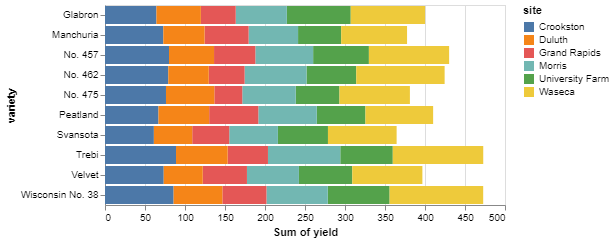

In [2]:
from vega_datasets import data

df = data.barley()
(
    alt
    # 1. Specificeer de data
    .Chart(df)
    # 2. Encode data naar visualizatie
    .encode(
        # 3. Statistische transformatie
        x='sum(yield)',
        y='variety',
        color='site'
    )
    # 4. Toevoegen van geometrisch object
    .mark_bar()
)

# Visualisaties opbouwen met Matplotlib, Seaborn en Altair.

Om te illustreren waarom een grammar-of-graphics API zo krachtig is, kunnen we deze vergelijken met de API's van het bekendste python visualisatie library [Matplotlib](https://matplotlib.org/) en het populaire statistische visualisatie package [Seaborn](https://seaborn.pydata.org/).
Matplotlib is een low-level visualisatie library in python. 
Met low-level visualisatie packages kunnen (bijna) alle mogelijke visualisaties gedefinieerd worden. 
Maar door deze flexibiliteit is het vaak complex in zijn er veel regels code om de gewenste visualisatie te maken.
Seaborn is een high-level API waarmee enkel statistische figuren worden genereerd. 
Door deze toespitsing op statistische visualisaties, kunnen je met Seaborn efficiënter visualisaties coderen.
Echter bij het ontwerpen van high-level API’s moeten ontwikkelaars afwegingen maken tussen gemak en flexibiliteit.
In mijn ervaring ontbreekt het bij Seaborn vaak net aan flexibiliteit om de gewenste visualisatie te maken.
De grammar-of-graphics zit qua ‘level’ op een sweet-spot: het is makkelijk genoeg om een visualisatie te definiëren, en flexibel genoeg om de gewenste visualisatie te maken. 
Matplotlib en Seaborn zijn allebei zeer goede visualisatie packages, en het is zeker waardevol om deze packages goed te kennen.
In een volgend blog zal Walid meer uitdiepen hoe Matplotlib en Seaborn specifiek werken.

*Disclaimer: Ik ben geen expert in deze packages, dus zou kunnen dat voorbeelden simpeler en/of eleganter kunnen.*

## Tidy dataset

Veel visualisatie libraries (waaronder Altair en Seaborn) werken het beste als data geformatteerd is als een [Tidy](https://en.wikipedia.org/wiki/Tidy_data) dataframe. 
Dat wil zeggen iedere rij is een observatie, en de kolommen geven de informatie over deze observatie. 
In het voorbeeld maken we scatterplots van de breedte en lengte van de kelk van een bloem. 
Om scatterplots te maken, bevat de data de lengte en breedte als kolommen. 
Afhankelijk van het soort plot dat je maakt, is het soms nodig om de data te transformeren naar long-format via `pd.melt`.


In [3]:
df = data.iris()
df.head(5)

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Matplotlib

Om de API's van van Matplotlib, Seaborn en Altair te vergelijken maken we een figuur waar de grammar-of-graphics API goed tot uiting komt, namelijk een facet met 3 scatterplots van de 3 verschillende species in de iris dataset (Setosa, Versicolor en Verginica). 
Daarnaast wil ik de as limieten handmatig configureren.

Matplotlib is een low-level plot library, zonder directe pandas integratie. 
Daarom is het vaak bewerkelijk om met Matplotlib een figuur te maken, en ik moet de syntax meestal weer opzoeken.
Om ons voorbeeld te maken, moeten we:

1. Een leeg canvas aanmaken voor de 3 subplots
2. Ieder subplot vullen met de juiste data en vervolgens opmaken door het toevoegen van as-limieten, as-labels en subplot titels.

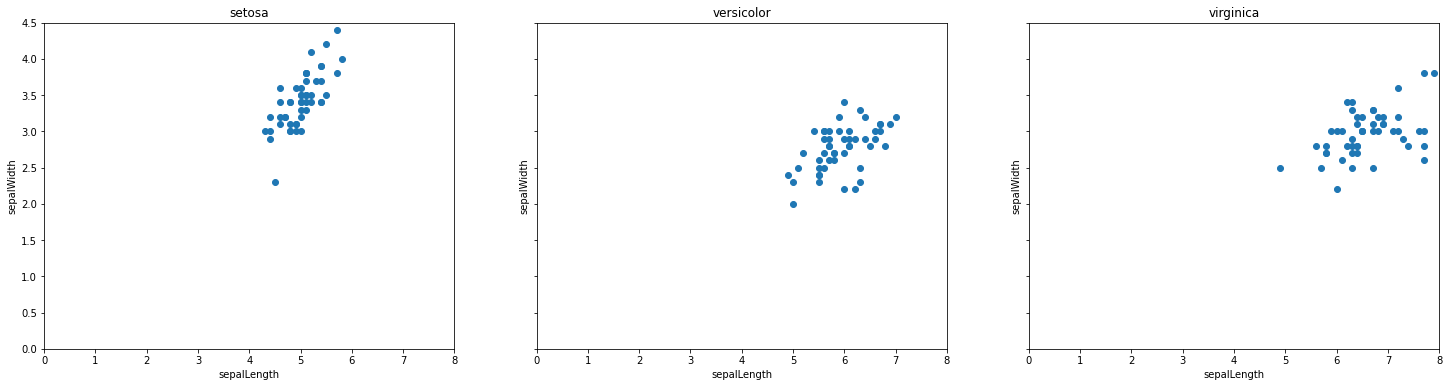

In [4]:
import matplotlib.pyplot as plt

# Handmatig gespecificeerde as-limieten
XLIM = (0,8)
YLIM = (0,4.5)

species = df["species"].unique()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 6), sharex=True, sharey=True)
for idx, specie in enumerate(species):
    # Aanmaken van de scatterplot
    _df = df.query("species==@specie")
    axs[idx].scatter(x=_df["sepalLength"], y=_df["sepalWidth"])
    
    # We maken de axis direct op
    axs[idx].set_ylim(YLIM)
    axs[idx].set_xlim(XLIM)
    
    axs[idx].set_title(specie)
    axs[idx].set_xlabel("sepalLength")
    axs[idx].set_ylabel("sepalWidth")

## Seaborn

De API van Seaborn bevat verschillende high-level functies voor voornamelijk statische weergaves van data. 
Bijvoorbeeld `sns.scatterplot` en `sns.boxplot`. 
Hierdoor is het met Seaborn heel makkelijk om snel standaard statistische visualisaties te maken.
Daarnaast zijn figuren en assen automatisch gelabeld door goede Pandas integratie.
Mocht je echter net af willen wijken van een standaard visualisatie, wat in de praktijk regelmatig voorkomt, dan is de API niet intuïtief meer.
Om de facet van 3 scatterplots van het voorbeeld te maken voldoet `sns.scatterplot` niet meer. 
Er wordt in de documentatie aangeraden om `sns.relplot` te gebruiken. 
Deze functie maakt weer gebruik van `sns.FacetGrid` om het facet te bouwen. 
Om de aslimiteten aan te passen, moeten deze als kwargs aan `sns.FacetGrid` meegeven om worden.
Gelukkig is dit allemaal gedocumenteerd, maar om dit te vinden moest ik wel naar het laatste voorbeeld van de `sns.scatterplot` [docs](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) scrollen. 
In mijn ervaring moet vaak een onderliggend Matplotlib object aan gepast worden om de gewenste lay-out te krijgen.

In vergelijking met Matplotlib is het met Seaborn een stuk makkelijker om statistische visualisaties te maken, je moet echter wel de juiste functie voor je plot opzoeken. En deze functie moet precies aan je wensen voldoen.

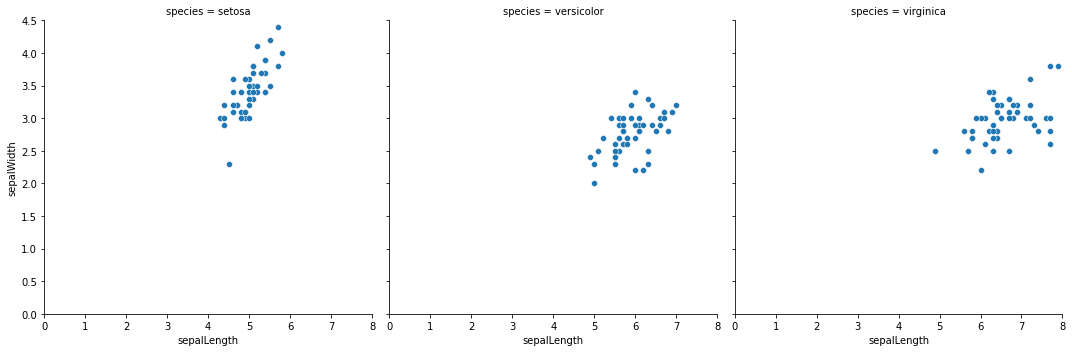

In [5]:
import seaborn as sns

# Let op: ik kan geen sns.scatterplot gebruiken om facet van 3 kolommen te genereren.
# Daarnaast moeten xlim en ylim meegegeven als kwargs sns.Facetplot die gebruikt wordt de facet te creeren.
facet_kws = {
    "sharey":True, 
    "xlim":XLIM, 
    "ylim":YLIM
}
sns.relplot(
    data=df, 
    x=df["sepalLength"], 
    y=df["sepalWidth"], 
    kind="scatter", 
    col="species", 
    facet_kws=facet_kws
);

## Altair

In Altair wordt een figuur opgebouwd volgens de grammar-of-graphics. 
Dit gaat door het chainen van Altair objecten. 
Hier zie je dat we: 

1. Een Chart object initialiseren met de data.
2. We specificeren de data voor de assen, en direct ook dat de `species` kolom gebruikt wordt om het figuur in 3 subplots op te delen
3. Vervolgens specificeren we dat we de data als `points` willen visualiseren, via `mark_point()`.

In deze stappen kan je dezelfde logica herkennen als bij het definiëren van het bovenstaande barchart. 
Dus als je de logica door hebt, is het mogelijk om visualisaties te maken zonder de documentatie te lezen!

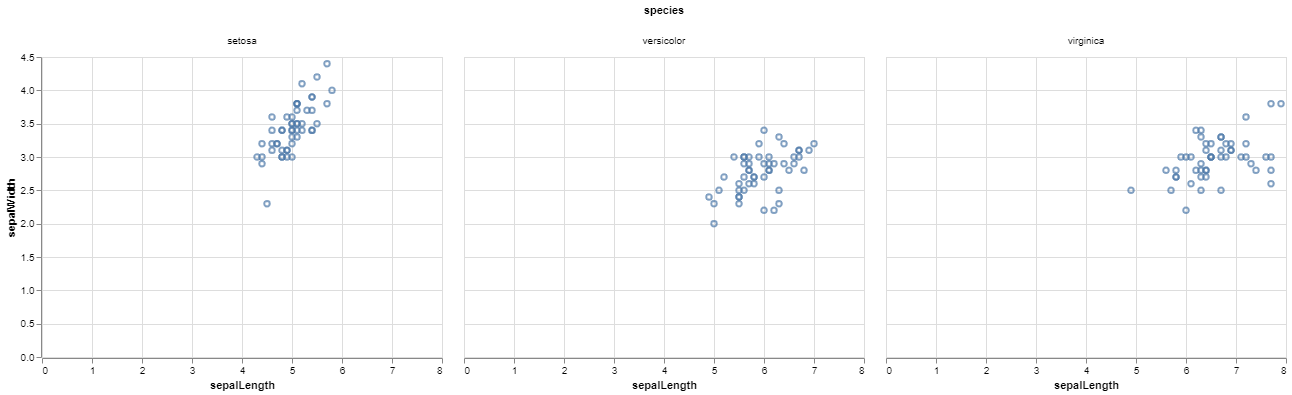

In [6]:
# Om x en y limiten te defineren verwachten de X als een Scale object.
(
    alt
    .Chart(df)
    .encode(
        x=alt.X("sepalLength", scale=alt.Scale(domain=XLIM)),
        y=alt.Y("sepalWidth", scale=alt.Scale(domain=YLIM)), 
        column="species"
    )
    .mark_point()
)

# Een visualisatie opbouwen met Altair

Voor meer inzicht in de logica, bouwen we het voorbeeld stap voor stap op. 
In het voorbeeld hieronder worden de volgende stappen 1 voor 1 uitgevoerd en gevisualiseerd:

1) We laden de data in een Chart object (`Chart(df)`) en visualiseren deze als een punt (`mark_point()`. 
    De visualisatie bevat een punt weer voor ieder datapunt in ons dataframe.
    Nu overlappen alle punten, omdat deze nog geen x- of y-coördinaten bevatten.
2) Vervolgens splitsen we de data op de x-as door het toevoegen van een x-coördinaten `encoding(x=...)`. 
    De output is een 1-dimensionaal scatterplot.
3) Door toevoegen van y-as encoding creëren we 2-dimensionaal scatterplot.
4) Toevoegen van de `column` encoding zorgt ervoor dat data verspreid wordt over 3 scatterplots, een voor ieder specie.

Zie de [getting started](https://altair-viz.github.io/getting_started/starting.html) sectie van de Altair documentatie voor meer achtergrond in het opbouwen van visualisaties.

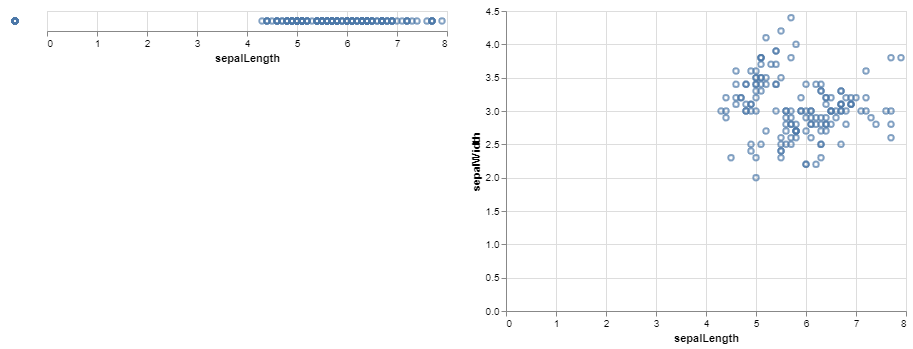

In [7]:
# 1. Initializeren van chart object
points = (
    alt
    .Chart(df)
    .mark_point()
)

# 2. Data punten plotten op x-as
x_points = points.encode(x="sepalLength")
# 3. Data punten plotten op y-as
x_y_points = x_points.encode(y="sepalWidth")

# Plots kunnen makkelijk horizontaal naast elkaar worden weergegeven mbv de `|` operator
points | x_points | x_y_points

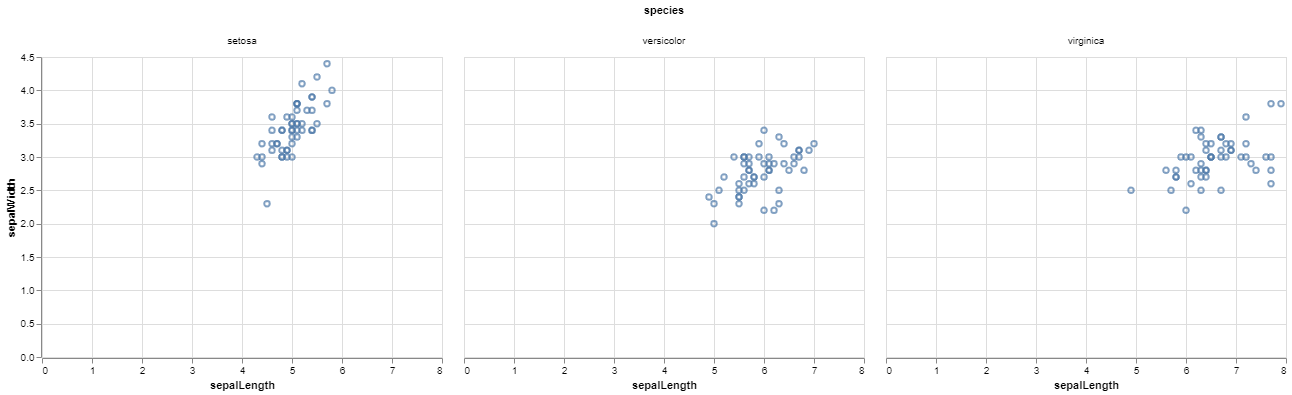

In [8]:
# 4. Scatterplot opsplitsen in een plot per species
# We gebruiken `column` zodat de losse plots ieder een eigen kolom krijgen.
facet = x_y_points.encode(column="species") # Probeer eens .encode(color="species")
facet

# Complexere visualisaties

Nu we de grammar-of-graphics geïntroduceerd hebben volgen hier een 2 visualisaties om te laten zien hoe complexere plots opgebouwd worden.
Het opbouwen van ingewikkeldere plots gaat vaak door het combineren van verschillende `mark_*` properties. 
Voor het maken van een grafiek met lijnen en punten, is de opzet:
1) Maak een base chart, en voeg data en encodings toe
2) Gebruik de base chart om 2 charts te maken, een met punten en een met lijnen.
3) Overlay de de 2 charts via `point + line`

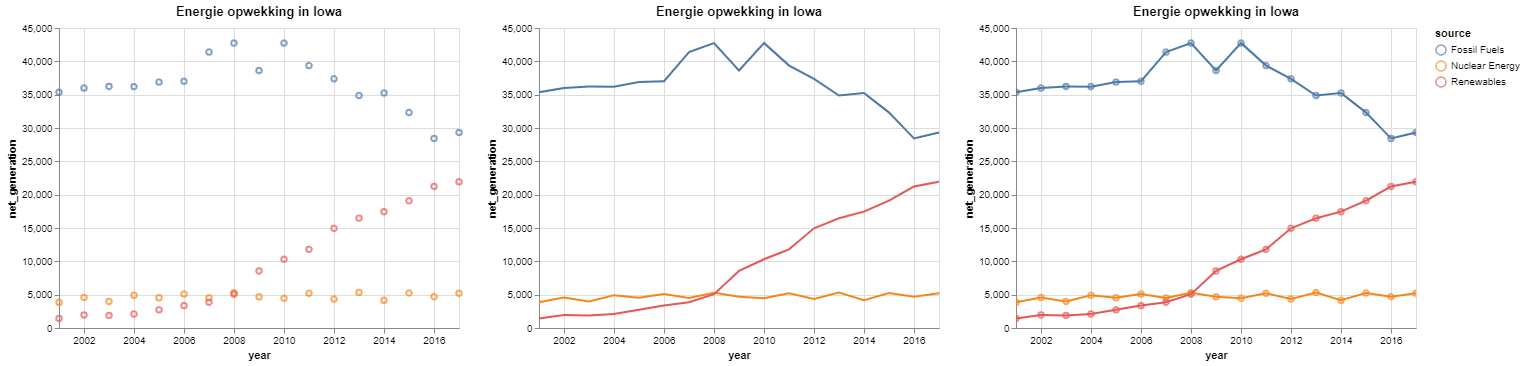

In [9]:
df = data.iowa_electricity()

base = (
    alt
    .Chart(df, title="Energie opwekking in Iowa")
    .encode(
        x="year",
        y="net_generation",
        color="source",
        tooltip="net_generation"
    )
)

point = base.mark_point()
line = base.mark_line()
point_line = point + line

# Test de interactiviteit zelf in google colab met de badge bovenaan het notebook (zoomen, pannen en tooltip!)
point | line | point_line.interactive() 

Altair bevat een grote toolkit voor statistische analyses. 
In dit voorbeeld worden `mark_*` properties gecombineerd om een gemiddelde met onzekerheidsintervallen weer te geven met als annotatie het aantal datapunten waarop de bootstrap is gebaseerd. Zo kan je direct zien dat een interval berekend vanuit weinig datapunten onbetrouwbaar is.
De logica volgt weer eenzelfde opzet:

1. Base chart met x-as, y-as en tooltip encodings. 
    De sortering van de x-as zit in de base chart, zodat deze toegepast wordt voor alle figuren.
2. Bereken gemiddeldes en voeg deze toe als points via `mark_point()`
3. Bereken onzekerheidsintervallen en voeg deze toe als error bar via `mark_rule()`
4. Bereken het aantal datapunten en voeg deze toe als text via `mark_text()`
5. Maak een overlay van alle figuren

Het opmaken van de marks gebeurd door het meegeven van parameters aan de desbetreffende `mark_*()` methode. Zie `mark_point()` en `mark_text()` in het voorbeeld.


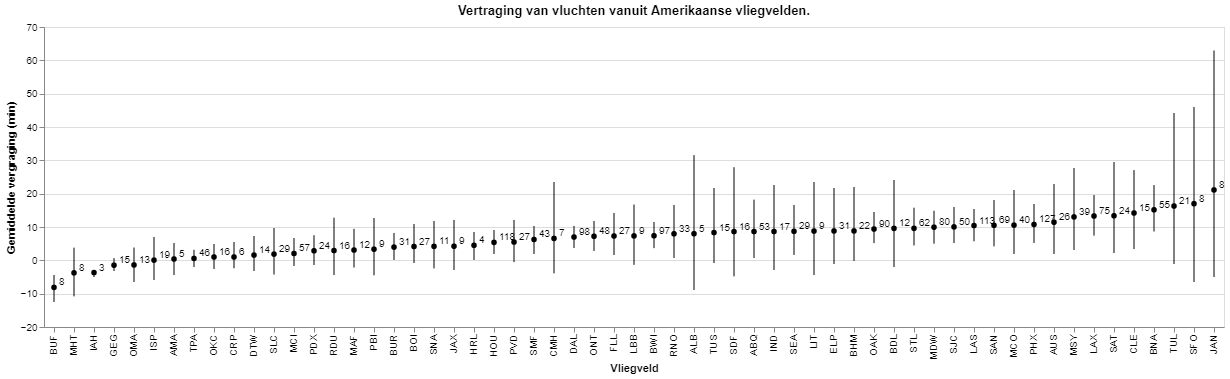

In [10]:
df = data.flights_2k()

base = (
    alt
    .Chart(
        df, 
        title="Vertraging van vluchten vanuit Amerikaanse vliegvelden.",
    )
    .encode(
        x=alt.X(
            "origin",
            sort=alt.EncodingSortField("delay", op="mean"),
            title="Vliegveld"
        ),
        y=alt.Y("mean(delay)", title="Gemiddelde vergraging (min)"),
        tooltip=["origin","mean(delay)","count(delay)"]
    )
)

points = (
    base
    .mark_point(color="black", filled=True)
)


error_bars = (
    base
    # Altair heeft veel ingebouwde aggragatie functies, waaronder bootstrapped 95% confidence intervals
    # https://altair-viz.github.io/user_guide/encoding.html#binning-and-aggregation
    .encode(y="ci0(delay)", y2="ci1(delay)")
    .mark_rule()
)

annotation = (
    base
    .encode(text='count(delay)')
    .mark_text(
        align='left',
        baseline='middle',
        fontSize=10,
        dx=5,
        dy=-5
    )
)

points + error_bars + annotation

# One visualization library to rule them all?

Naast deze voorbeelden kan Altair nog heel veel meer visualisaties maken, zoals geografische maps.
Neem vooral eens een kijkje in de [example gallery](https://altair-viz.github.io/gallery/index.html)!

Maar zoals ieder visualisatie library in python, komt zelfs Altair met een aantal nadelen.
Altair is gebouwd op een JavaScript library (Vega-Lite). 
Wat Altair eigenlijk doet is een `json` genereren, waar Vega-Lite vervolgens een visualisatie van maakt.
Doordat JavaScript de figuren gegenereerd is het makkelijk om interactieve visualisaties in een browser te tonen.
Echter:

- De ontwikkelomgeving heeft wel toegang tot Vega-Lite en de juiste JavaScript afhankelijkheden nodig om figuren te visualiseren.
    Gelukkig bevat JupyterLab een Vega-Lite installatie, maar andere IDE’s wellicht niet.
    Om figuren als `.png` of `.pdf` op te slaan zijn weer extra JavaScript afhankelijkheden nodig, die niet standaard met JupyterLab komen.
- Altair geeft een `json` door aan Vega-Lite, deze `json` specificatie wordt opgeslagen in de output van een notebook. 
    Altair notebooks kunnen daardoor erg groot worden, zie [`MaxRowsErrror`](https://iliatimofeev.github.io/altair-viz.github.io/user_guide/faq.html#maxrowserror-how-can-i-plot-large-datasets). 
- Altair genereerd en valideert de `json` specificatie voor Vega-Lite. 
    Kan voorkomen dat json specificatie valide is, maar toch niet het juiste figuur genereerd. 
    In dit geval geeft Altair geen error of warning, maar wordt de warning of error gegenereerd door Vega-Lite. 
    Deze warnings/errors zijn zichtbaar in de browser console maar niet in de Python output.
    Hierdoor lijkt het dat alles werkt, terwijl dat niet het geval is.
- Met de grammar-of-graphics is het mogelijk om snel inzichten in data te krijgen. 
    Mocht je echter een zeer specifieke opmaak nodig hebben, dan is - net als bij andere packages - veel werk.

Samenvattend is Altair een flexibele visualisatie library waarmee je snel statistische visualisaties maakt.
Het is - omdat ik JupyterLab gebruik voor analyses - momenteel mijn visualisatie-library that rules them all.

# References
- Altair documentatie (https://altair-viz.github.io/)
- Grammar of graphics (boek): https://link.springer.com/book/10.1007/978-1-4757-3100-2
- Grammar of graphics (lecture notes): https://cfss.uchicago.edu/notes/grammar-of-graphics/
- Overzicht van plot libraries in python door Jake van de Plas (ontwikkelaar van Altair) https://www.youtube.com/watch?v=FytuB8nFHPQ

---
__Tags__: \#data-science \#visualisatie \#python \#Altair \#Seaborn \#Matplotlib \#grammar-of-graphics  
__Auteur__: Remco Rodenburg